# Übung 01 - Python Einführung

Python ist eine vielseitige Programmiersprache, die unter anderem ergänzt durch einige bekannte Bbliotheken (numpy, scipy, matplotlib) ein ebenso wertvolles wie niederschwelliges Werkzeug des wissenschaftlichen Arbeits geworden ist.

Während die meisten von Ihnen vermutlich schon erste Erfahrungen mit Python gesammelt haben, soll diese Übung den anderen einen zügigen Einstieg in die Sprache und das damit verbundene wissenschatliche Arbeiten vermitteln.

In dieser Übung behandeln wir:
* Python Grundlagen: Datentypen (Container, Listen, Dictionaries, Sets, Tupel), Funktionen, Klassen
* Numpy: Arrays, Array-Indizierung, Datentypen, Berechnungen mit Arrays, Broadcasting
* Matplotlib: das Plotten, Subplots, Bilder

## Aufgabenstellung

Im Verlauf dieser Einführung gibt es Codebeispiele in denen Zeilen mit dem Kommentarzeichen `#` versehen sind.
Diese Kommentare sind von Ihnen auszuformulieren. Nutzen Sie die Gelegenheit auch vermeintlich einfache Abschnitte gewissenhaft auszufüllen. Die Kommentare beziehen sich immer entweder auf die gleiche Zeile oder auf den folgenden Abschnitt.
Wenn Sie können, beschreiben Sie gerne bevor Sie sich die Ausgabe des Abschnittes darunter angesehen haben, wie *genau* diese aussehen wird.
Das gibt Ihnen die Möglichkeit ihren eigenen Wissensstand realistisch einschätzen zu können und ein Gefühl dafür zu erlangen, in welchen Kapiteln der externen Dokumentation Sie am meisten neues Erfahren werden.

## zu Python Versionen

Wie in den Folien angekündigt, verwendet dieser Kurs Python 3.9.
Sie können die verwendete Version in der Kommandozeile mit `python --version` anzeigen lassen.

Anaconda wird derzeit mit Python 3.9 ausgeliefert, was Ihnen die Arbeit erleichtern sollte.

In [30]:
!python --version

Python 3.9.12


## Python Grundlagen

Python ist eine dynamisch typisierte Mehrparadigmen-Programmiersprache. Von Python-Code wird oft gesagt, er sei fast wie Pseudocode, da er es ermöglicht, sehr leistungsfähige Ideen in sehr wenigen Codezeilen auszudrücken und dabei sehr lesbar zu sein. Als Beispiel ist hier eine Implementierung des klassischen Quicksort-Algorithmus in Python zu sehen:

In [31]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### grundlegende Datentypen

#### Zahlen

Integer und Fließkommazahlen werden wie auch von anderen Programmiersprachen erwartet unterstützt:

In [32]:
x = 3
print(x, type(x))

3 <class 'int'>


In [33]:
print(x + 1)   # Addition der Operanden x und 1. Anschließend wird das Ergebnis "4" auf der Standardausgabe ausgegeben
print(x - 1)   # Subtraktion der Operanden x und 1. Anschließend wird das Ergebnis "2" auf der Standardausgabe ausgegeben
print(x * 2)   # Multiplikation der Operanden x und 1. Anschließend wird das Ergebnis "6" auf der Standardausgabe ausgegeben
print(x ** 2)  # Berechnet die zweit Potenz von 3. Anschließend wird das Ergebnis "6" auf der Standardausgabe ausgegeben

4
2
6
9


In [34]:
x += 1
print(x)
x *= 2
print(x)

4
8


In [35]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<class 'float'>
2.5 3.5 5.0 6.25


Beachten sie, dass Python anders als andere Sprachen nicht über unäre In- und Dekrementoren (x++, x--) verfügt.

Python verfügt jedoch über Datentypen für besonders große sowie komplexe Zahlen; Details dazu finden Sie in der entsprechende [Dokumentation](https://docs.python.org/3.9/library/stdtypes.html#numeric-types-int-float-long-complex).

#### boolsche Werte

In Python sind zwar gängige Operatoren für boolsche Logik implementiert, werden aber durch englische Wörter statt durch Symbole (`&&`, `||`, etc.) ausgedrückt:

In [36]:
t, f = True, False
print(type(t))

<class 'bool'>


Zu den Operatoren:

In [37]:
print(t and f) # Verundung von t und f mit anschließender Ausgabe des Ergebnisses "False" auf der Standardausgabe
print(t or f)  # Veroderung von t und f mit anschließender Ausgabe des Ergebnisses "True" auf der Standardausgabe
print(not t)   # Negierung von t mit anschließender Ausgabe des Ergebnisses "False" auf der Standardausgabe
print(t != f)  # Übeprüft ob t nicht gleich f ist mit anschließender Ausgabe des Ergebnisses "True" auf der Standardausgabe

False
True
False
True


#### Strings

In [38]:
hallo = 'hallo'   # Zweisung des Wertes 'hallo' zu der Variablen hallo
welt = "welt"
print(hallo, len(hallo))

hallo 5


String-Objekte stellen einige nützliche Methoden zur Verfügung, beispielsweise:

In [39]:
s = "hallo"
print(s.capitalize())  # Macht aus dem ersten Zeichen ein uppercase Zeichen
print(s.upper())       # Macht aus allen Zeichen uppercase Zeichen
print(s.rjust(7))      # Richtet einen String nach der gegebenen Länge nach rechts aus. Übrige Zeichen links vom String werden mit Spaces aufgefüllt
print(s.center(7))     # Zentriert einen String nach der gegebenen Länge. Übrige Zeichen links und rechts vom String werden mit Spaces aufgefüllt
print(s.replace('l', '(all)'))  # Gibt eine Kopie des Strings zurück in der alle Vorkommnisse des gegebenen Substrings mit den gegeben Strings ersetzt werden
print('  welt '.strip())  # Gibt eine Kopie des Strings zurück in dem alle führenden und endenden Spaces entfernt wurden

Hallo
HALLO
  hallo
 hallo 
ha(all)(all)o
welt


Alle Methoden finden sich auch in der [Dokumentation](https://docs.python.org/3.9/library/stdtypes.html#string-methods).

### Container

Python enthält verschiedene Container-Typen: Listen, Wörterbücher (Dictionaries), Sets und Tupel.

#### Listen

Eine Liste ist das Python-Äquivalent eines Arrays, kann aber in seiner Größe verändert werden und Elemente unterschiedlicher Typen enthalten:

In [40]:
xs = [3, 1, 2]   # Der Variablen xs wird eine Liste mit den Elementen 3, 1 und 2 zugewiesen
print(xs, xs[2])
print(xs[-1])     # Das letzte Element der List xs wird auf der Standardausgabe ausgegeben

[3, 1, 2] 2
2


In [41]:
xs[2] = 'foo'    # Der zweite Platz der Liste wird mit dem String 'foo' ersetzt
print(xs)

[3, 1, 'foo']


In [42]:
xs.append('bar') # Der Liste wird am Ende der String 'bar' angehängt
print(xs)  

[3, 1, 'foo', 'bar']


In [43]:
x = xs.pop()     # Das letzte Elemente der List wird entfernt und der Variablen x zugewiesen
print(x, xs)

bar [3, 1, 'foo']


Wie gehabt finden sich weitere Details zu Listen in der entsprechenden [Dokumentation](https://docs.python.org/3.9/tutorial/datastructures.html#more-on-lists).

#### Slicing (von Listen)

Neben dem Zugriff auf einzelne Elemente von Listen gibt es in Python auch die Möglichkeit auf ganze Unterbereiche von Listen zuzugreifen, was "Slicing" genannt wird:


In [44]:
nums = list(range(5))    # Erzeugt eine List mit den Werten 0...4
print(nums)         # Gibt die Liste auf der Standardausgabe aus: "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Gibt die Subliste von Index 2 bis 4 (exklusive) auf der Standardasgabe aus
print(nums[2:])     # Gibt die Subliste von Index 2 bis zum Ende auf der Standardausgabe aus
print(nums[:2])     # Gibt die Subliste von Anfang bis zum Index 2 (exklusive) auf der Standardausgabe aus
print(nums[:])      # Gibt die gesamte Liste auf der Standardausgabe aus
print(nums[:-1])    # Gibt die Subliste vom Anfang bis zum letzten Index (exklusive) auf der Standardausgabe aus
nums[2:4] = [8, 9]  # Ersetzt die Sublist vom Index 2 bis 4 (exklusive) mit der Liste [8, 9]
print(nums)         # Gibt "[0, 1, 8, 9, 4]" auf der Standardausgabe aus

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


#### Schleifen

Sie können über die Elemte einer Liste wie folgt iterieren:

In [45]:
tiere = ['Katze', 'Hund', 'Affe']
for tier in tiere:
    print(tier)

Katze
Hund
Affe


Um auf den Index eines Elements in der Schleife zugreifen zu können, bietet sich die Funktion `enumerate` an:

In [46]:
tiere = ['Katze', 'Hund', 'Affe']
for idx, tier in enumerate(tiere):
    print('#{}: {}'.format(idx + 1, tier))

#1: Katze
#2: Hund
#3: Affe


#### List Comprehension



Beim Programmieren werden häufig die gleichen Operationen auf mehrere Werte angewendet. Ein einfaches Beispiel dafür ist der folgende Code, der Zahlen quadriert: 

In [47]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


Mit der sogenannten "List Comprehension" kann man das obige Beispiel verkürzen:

In [48]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


Dieses sprachliche Feature von Python kann auch Bedingungen enthalten:

In [49]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


#### Dictionaries

In Python gibt es den Typ des Dictionaries, der wie der Name vermuten lässt ähnlich wie in einem Wörterbuch einen Key-Value-Store darstellt.
Vergleichbar sind Maps in Java, oder Objekte in Javascript.

In [50]:
d = {'cat': 'cute', 'dog': 'furry'} # Weißt der Variablen d ein Dictionary zu, mit den Schlüsseln 'cat und 'dog' und den dazugehörigen Werten 'cat'->'cute' und 'dog'->'furry'
print(d['cat'])       # Gibt den Wert vom Schlüssel 'cat' auf der Standardausgabe aus, welcher 'cute' ist
print('cat' in d)     # Stellt fest ob der Schlüssel 'cat' in d enthalten ist

cute
True


In [51]:
d['fish'] = 'wet'    # Erstellt ein zusätzliches Schlüssel-Wert Paar 
print(d['fish'])     # Gibt den Wert von 'fish' auf der Standardausgabe aus

wet


In [52]:
print(d['monkey'])  # Versucht den Wert von 'monkey' auszugeben was zu einem Fehler führt, da 'monkey' nicht in d ist

KeyError: 'monkey'

Einen solchen Fehler kann man umgehen, indem man einen Default-Wert angibt, der zurückgegeben werden soll, wenn es den angeforderten Schlüssel nicht gibt:

In [ ]:
print(d.get('monkey', 'N/A'))  # Gibt 'N/A' aus
print(d.get('fish', 'N/A'))    # Gibt 'wet' aus

N/A
wet


In [ ]:
del d['fish']        # Entfernt den Schlüssel 'fish' und den dazugehörigen Wert aus dem Dictionary d
print(d.get('fish', 'N/A')) # Gibt 'N/A' aus

N/A


Alles weitere wissenswerte findet sich in der [Dokumentation](https://docs.python.org/3.9/library/stdtypes.html#dict).

Über die Werte in einem Dictionary kann man ausserdem ähnlich einer Liste iterieren:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Und ebenso ähnlich zur Liste gibt es "Dictionary Comprehensions", anders als bei der Liste werden diese genutzt um Dictionaries zu erstellen. Beispielsweise:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


#### Sets

Ein "Set" ist eine ungeordnete Sammlung verschiedener Werte.
Etwa so:

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # 'cat' ist im Set animals also 'True'
print('fish' in animals)  # 'fish' ist nicht im Set animals also 'False'

True
False


In [ ]:
animals.add('fish')      # Dem Set animals wird der String 'fish' hinzugefügt
print('fish' in animals)
print(len(animals))       # Gibt die Anzahl der Elemente im Set animals also "3" aus

True
3


Die Werte eines Sets sind immer verschieden --> das doppelte Vorkommen eines Elements ist nicht möglich:

In [ ]:
animals.add('cat')       # Hier passiert nichts, da cat bereits in animals entahlten ist. len(animals) = 3
print(len(animals))       
animals.remove('cat')    # 'cat' wird aus dem Set animals entfernt. len(animals) = 2
print(len(animals)) 

3
2


Auch über Sets kann man iterieren. Anders als Listen sind sie aber ungeordnet, sodass man keine Annahmen über die Reihenfolge treffen kann:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: dog
#2: cat
#3: fish


Auch "Set Comprehenision" gibt es. Vergleichbar mit Listen und Dictionaries lassen Sich so Sets schnell und unkmpliziert erstellen:

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


#### Tupel

Ein Tupel ist eine unveränderliche geordnete Liste von Werten. Im Wesentlichen ähneln Tupel Listen, können aber im Gegensatz zu ihnen als Schlüssel in Dictionaries verwendet werden, weil sie unveränderlich sind. Ein einfaches Beispiel:

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Erstellt ein Dictionary mit Einträgen der Art: (x, x+t): x
t = (5, 6)       # Weißt t das Tupel (5,6) zu. Gibt 5 und 1 aus
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


Tupel sind unveränderlich (immutable) und lösen einen TypeError aus, wenn man versucht entgegen der Einschränkung des Typs Werte zu ändern:

In [ ]:
t[0] = 1

TypeError: 'tuple' object does not support item assignment

#### Functions

Funktionen definiert man in Python mit dem Token `def`. Zum Beispiel:

In [ ]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


Häufig werden Funktionen definiert, die optionale Argumente haben:

In [ ]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


#### Klassen

Die Syntax um in Python Klassen zu definieren ist sehr einfach:

In [ ]:
class Greeter:

    # Definiert den Konstruktor und initialisiert das Feld name
    def __init__(self, name):
        self.name = name

    # Definiert eine Methode der Klasse Greeter
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Initialisiert ein Objekt der Klasse Greeter
g.greet()            # Ruft die Methode greeter auf
g.greet(loud=True)   # Ruft die Methode greeter auf diesmal wird der Paramter loud auf True gesetzt

Hello, Fred!
HELLO, FRED


Dabei sind die Defintionen, die ausserhalb von Klassen Funktionen einleiten in Klassen für das Anlegen von Methoden verantwortlich, verhalten sich damit aber im Endeffekt gleich.

## Numpy

Pythons Standardbibliothek verfügt über relativ viele Funktionen und Klassen, die ohne weitere Installation von Python-Paketen zur Verfügung stehen.
Eine Erweiterung Pythons, die nicht in der Standardbibliothek enthalten ist, ist Numpy. Numpy ist 'die' Kernbibliothek, wenn es darum geht mit Python wissenschaftlich zu arbeiten. Sie stellt unter anderem ein hochperformantes mehrdimensionales Array-Objekt sowie Werkzeuge und Funktionen zum Bearbeiten dieser zur Verfügung.
Wer (unter den ITlern) schonmal mit MATLAB gearbeitet hat, könnte diese [Anleitung](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) nützlich finden, um mit Numpy zu beginnen.

Um Numpy zu verwenden ist es notwendig, das package zu importieren, da es nicht in der Standardbibliothek enthalten ist:

In [ ]:
import numpy as np

### Arrays

Ein Numpy-Array ist ein Raster von Werten gleichen Typs, und wird durch ein Tupel nichtnegativer Ganzzahlen indiziert. Die Anzahl der Dimensionen ist der Rang des Arrays; die Form des Arrays ist ein Tupel von Ganzzahlen, die die Größe des Arrays entlang jeder Dimension angeben.

Man kann Numpy-Arrays aus verschachtelten Python-Listen initialisieren und mit eckigen Klammern auf Elemente zugreifen:

In [ ]:
a = np.array([1, 2, 3])  # Erstellt ein Array aus der gegebenen List mit den Elementen 1,2 und 3
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Ersetzt das erste Element durch 5
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Erstellt ein zweidimensionales Array aus einer Liste von Listen
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy stellt ausserdem viele Funktionen zur Verfügung, die initialisierte Arrays erstellen.

In [ ]:
a = np.zeros((2,2))  # Erstellt ein Array der Größe 2x2 welches mit nullen initialisiert wird
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Erstellt ein Array der Größe 1x2 welches mit einsen initialisiert wird
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Erstellt ein Array der Größe 1x2 welches mit 7en initialisiert wird
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Erstellt die Einheitsmatrix mit der Größe 2x2
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Erstellt ein Array der Größe 2x2 welches mit zufälligen Zahlen im Bereich [0, 1) initialisiert wird
print(e)

[[0.30486502 0.89572741]
 [0.31688462 0.6465911 ]]


### Array Indizierung

Numpy stellt verschiedene Wege zur Verfügung, Arrays zu indizieren.

Slicing: Ähnlich zu Pythons Listen können Numpy-Arrays In Slices geteilt werden. Da Arrays mehrdimensional sein können, muss für jede Dimension ein Slice angegeben werden:

In [ ]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) # Erstellt eine 3x4 Matrix aus einer Liste von Listen

b = a[:2, 1:3] # b wird aus der Matrix a erzeugt wobei nur die ersten beiden Zeilen und die zweite und die dritte Spalte benutzt werden
print(b)

[[2 3]
 [6 7]]


Ein Slice eines Arrays is ein "View" eine Abbildung der selben Daten, Änderungen die man am Slice vornimmt, nimmt man also im originalen Array vor.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # 
print(a[0, 1]) 

2
77


Man kann Integer- mit einer Slice-Indizierung kombinieren. Das führt unweigerlich zu einem Array niedrigeren Rangs als das Ursprungs-Array.
Das unterscheidet sich deutlich von der Art und Weise, wie MATLAB Array-Slices behandelt:

In [ ]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]]) # Erstellt eine 3x4 Matrix aus einer Liste von Listen
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Es gib zwei Wege, wie man auf die Daten der mittleren Reihe des Arrays zugreifen kann. Die Kombinierung von Integer-Idizierung und Slices gibt ein Array veringerten Rangs zurück, während nur Slices zu nutzen ein Array des Ranges des Original-Arrays ergibt:

In [ ]:
row_r1 = a[1, :]    # Gibt die zweite Zeile zurück als Matrix mit Rang 1
row_r2 = a[1:2, :]  # Gibt die zweite Zeile zurück als Matrix mit Rang 2
row_r3 = a[[1], :]  # Gibt die zweite Zeile zurück als Matrix mit Rang 2
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [ ]:
# Gibt die dritte Spalte wieder. Einmal als Array mit Rang 1 und das zweite mal als "Spaltenvektor"
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Ganzzahlige Array-Indizierung: Wenn man in Numpy-Arrays mit Slicing indiziert, ist die resultierende Array-Ansicht immer ein Subarray des ursprünglichen Arrays. Im Gegensatz dazu erlaubt die Integer-Array-Indizierung die Konstruktion beliebiger Arrays unter Verwendung der Daten eines anderen Arrays. Hier ist ein Beispiel:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

print(a[[0, 1, 2], [0, 1, 0]]) # Die erste List ist eine Liste mit Zeilenidices und die zweite Liste sind die Spaltenindices aus denen das neue Array konstruiert wird

print(np.array([a[0, 0], a[1, 1], a[2, 0]])) # Gibt das selbe  aus wie die obige Zeile

[1 4 5]
[1 4 5]


In [ ]:
print(a[[0, 0], [1, 1]]) # [2 2]

print(np.array([a[0, 1], a[0, 1]])) # [2 2]

[2 2]
[2 2]


Ein praktischer Trick bei der Indizierung von Integer-Arrays besteht darin, ein Element aus jeder Zeile einer Matrix auszuwählen oder zu verändern.

In [ ]:
# Erzeugt ein Array Elemenet der Größe 4x3 aus einer Liste von Listen
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
b = np.array([0, 2, 0, 1]) # Erzeugt ein Array aus der gegebenen List und weist es b zu

print(a[np.arange(4), b])  # Aus allen Zeilen wird jeweils das 1., 3., 1. und 2. Element zu einem neuen Array zusammengefügt

[ 1  6  7 11]


In [ ]:
# Die entsprechenden Werte aus obiger Zeile werden alle um 10 inkrementiert
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolesche Array-Indizierung: Mit der booleschen Array-Indizierung kann man beliebige Elemente aus einem Array heraussuchen. Häufig wird diese Art der Indizierung verwendet, um die Elemente eines Arrays auszuwählen, die eine Bedingung erfüllen. Hier ist ein Beispiel:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Gibt ein Array der Größe des Arrays a zurück wobei alle Eintrage die größer 2 sind durch True und ansonsten False ersetzt sind
        
print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
print(a[bool_idx]) # Gibt alle Werte größer zwei zurück

print(a[a > 2]) # Selbiges wie oben

[3 4 5 6]
[3 4 5 6]


Der Kürze halber wurden viele Details über die Indizierung von Numpy-Arrays weggelassen; wenn Sie mehr wissen wollen, sollten Sie die Dokumentation zu Rate ziehen.

### Datentypen

Jedes Numpy-Array ist ein Gitter aus Elementen desselben Typs. Numpy bietet eine große Anzahl von numerischen Datentypen, die zum Konstruieren von Arrays verwendet werden können. Numpy versucht, einen Datentyp zu erraten, wenn man ein Array erstellt,
aber Funktionen, die Arrays konstruieren, enthalten normalerweise auch ein optionales Argument, um den Datentyp explizit anzugeben.
Hier ist ein Beispiel:

In [ ]:
x = np.array([1, 2])  # Erstellt ein Array aus zwei Integern
y = np.array([1.0, 2.0])  # Erstellt ein Array aus zwei Floating-Point Zahlen
z = np.array([1, 2], dtype=np.int64)  # Erstellt ein Array und setzt den Typ der Elemente auf Integer

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


Alles weitere über Datentypen lässt sich in der [Dokumentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) nachlesen.

### Array-Mathematik

Mathematische Grundfunktionen arbeiten elementweise auf Arrays und sind sowohl als Operatorüberladungen als auch als Funktionen im numpy-Modul verfügbar:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# 
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Subtrahiert jedes Elemente von x mit dem Element mit den selben Indices von y
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Multipliziert jedes Elemente von x mit dem Element mit den selben Indices von y
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Dividiert jedes Elemente von x mit dem Element mit den selben Indices von y
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Zieht die Wurzel von jedem Element von x
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


**Achtung:** `*` ist im Gegensatz zu in MATLAB eine elementweise Multiplikation und keine Matrixmultiplikation. Stattdessen verwendet man die Funktion `dot` zur Berechnung innerer Produkte von Vektoren, zur Multiplikation eines Vektors mit einer Matrix und zur Multiplikation von Matrizen. `dot` ist sowohl als Funktion im Numpy-Modul als auch als Instanzierungsmethode von Array-Objekten verfügbar:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Berechnet das Skalarprodukt aus v und w
print(v.dot(w))
print(np.dot(v, w))

219
219


Man kann auch den `@`-Operator verwenden, der dem Punktoperator von Numpy entspricht.

In [ ]:
print(v @ w)

219


In [ ]:
# FÜhrt die Matrixultiplikation durch für die Matrix x und den Vektor v
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
# Führt die Matrixmultiplikation für zwei Matrizen aus
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy bietet viele nützliche Funktionen zur Durchführung von Berechnungen auf Arrays; eine der nützlichsten ist `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Liefert die Summe aller Elemente von x
print(np.sum(x, axis=0))  # Liefert die Summe für jede Spalte
print(np.sum(x, axis=1))  # Liefert die Summe für jede Zeile

10
[4 6]
[3 7]


Die vollständige Liste der von numpy bereitgestellten mathematischen Funktionen finden Sie in der [Dokumentation] (http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Neben der Berechnung mathematischer Funktionen mit Hilfe von Arrays müssen häufig Daten in Arrays umgestaltet oder anderweitig manipuliert werden. Das einfachste Beispiel für diese Art von Operation ist das Transponieren einer Matrix; um eine Matrix zu transponieren, verwenden Sie einfach das T-Attribut eines Array-Objekts:

In [ ]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


### Broadcasting

Broadcasting ist ein leistungsfähiger Mechanismus, der es Numpy ermöglicht, bei der Durchführung arithmetischer Operationen mit Arrays unterschiedlicher Form zu arbeiten. Häufig hat man ein kleineres und ein größeres Array und möchte das kleinere Array mehrfach verwenden, um eine Operation am größeren Array durchzuführen.

Nimmt man zum Beispiel an, dass zu jeder Zeile einer Matrix ein konstanter Vektor hinzugefügt werden soll:

In [ ]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Liefert ein Array mit gleicher Größe wie x aber uninitialisierten Daten

# Addiert auf jeden Zeilenvektor von x den Vektor v und schreibt das Ergebnis in y

for i in range(4):
    y[i, :] = x[i, :] + v

print(y)
print(x + v)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Die Zeile `y = x + v` funktioniert, obwohl `x` die Form `(4, 3)` und `v` die Form `(3,)` hat; diese Zeile funktioniert, als ob `v` tatsächlich die Form `(4, 3)` hätte, wobei jede Zeile eine Kopie von `v` wäre und die Summe elementweise durchgeführt werden würde.

Das Broadcasten/Übertragen von zwei Arrays folgt diesen Regeln:

1. Wenn die Arrays nicht den gleichen Rang haben, wird der Form des Arrays mit dem niedrigeren Rang eine 1 vorangestellt, bis beide Formen die gleiche Länge haben.
2. Die beiden Arrays gelten in einer Dimension als kompatibel, wenn sie in dieser Dimension die gleiche Größe haben, oder wenn eines der Arrays in dieser Dimension die Größe 1 hat.
3. Die Arrays können zusammen übertragen werden, wenn sie in allen Dimensionen kompatibel sind.
4. Nach dem Broadcasting verhält sich jedes Array so, als hätte es die Form, die dem elementweisen Maximum der Formen der beiden Eingabe-Arrays entspricht.
5. In jeder Dimension, in der ein Array die Größe 1 und das andere Array eine Größe größer als 1 hat, verhält sich das erste Array so, als ob es entlang dieser Dimension kopiert würde.

Wenn diese Erklärung zu kurz ist, findet sich eine ausführlicher Darstellung in der [Dokumentation] (http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). Auch diese [Erklärung] (http://wiki.scipy.org/EricsBroadcastingDoc) ist gut zu lesen.

Funktionen, die Broadcasting unterstützen, werden als universelle Funktionen bezeichnet. Eine Liste aller universellen Funktionen findet sich in der [Dokumentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

**Achtung**: Python ist bedingt durch seine Art als Skriptsprache verhältnismäßig langsam.
Wann immer sich die Gelegenheit ergibt, universelle Funktionen oder generell die stark optimierten Funktionen aus numpy zu nutzen um eine Berechnung durchzuführen, ist die Benutzung der library-Funktionen eigenen Implementationen aus Geschwindigkeitsgründen vorzuziehen.

Hier sind einige Anwendungen von Broadcasting:

In [ ]:
v = np.array([1,2,3])
w = np.array([4,5])

print(np.reshape(v, (3, 1)) * w) # Mit reshape wird aus v ein Spaltenvektor und dann wird jede i-te Zeile aus w mit dem i-ten Element aus v multipliziert

[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
x = np.array([[1,2,3], [4,5,6]])

print(x + v) # Addiert jede Zeile von x mit v

[[2 4 6]
 [5 7 9]]


In [ ]:
print((x.T + w).T) # Transponiert x in eine 3x2 Matrix und addiert dann zu jeder Zeile w und transponiert das Ergebnis zurück in eine 2x3 Matrix

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
print(x + np.reshape(w, (2, 1))) # Das selbe Ergebnis wie oben nur das w in einen Spaltenvektor transponiert wird um dann auf die Spalten von x addiert zu werden

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
print(x * 2) # Multipliziert alle Elemente von x mit 2

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting macht den Code in der Regel übersichtlicher und schneller, daher sollte man sich bemühen, es zu verwenden, wo immer es möglich ist.

Dieser kurze Überblick hat viele der wichtigen Dinge, die man über numpy wissen sollte angesprochen, ist aber bei weitem nicht vollständig. Weitere Informationen finden sie in der [numpy Referenz](http://docs.scipy.org/doc/numpy/reference/).

## Matplotlib

Matplotlib ist eine Plotting-Bibliothek. In diesem Abschnitt wird eine kurze Einführung in das Modul matplotlib.pyplot gegeben, das ein Plottsystem ähnlich dem von MATLAB bietet.

In [53]:
import matplotlib.pyplot as plt

Durch die Ausführung dieses speziellen iPython-Befehls werden die Diagramme inline angezeigt:

In [54]:
%matplotlib inline

### Plotting

Die wichtigste Funktion in matplotlib ist `plot`, mit der 2D-Daten dargestellt werden können. Hier ist ein einfaches Beispiel:

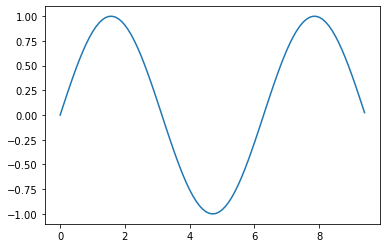

In [ ]:
# Berechnet die Werte von sin(x) für 0 <= x <= 3pi mit Schrittweite von 0.1
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Visualisiert die zuvor berechnetet Sinusfunktion
plt.plot(x, y)

Mit ein wenig zusätzlicher Arbeit können problemlos mehrere Linien auf einmal gezeichnet werden und ein Titel, eine Legende und Achsenbeschriftungen hinzufügt werden:

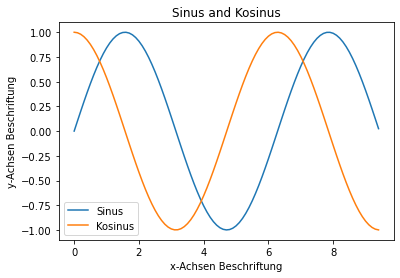

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Visualisiert beide Funktionen in einer Grafik. Fügt eine Beschreibung für x und y-Achse, einen Titel und eine Legende die beschreibt werlche Kurve zu welcher Funktion gehöt hinzu
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x-Achsen Beschriftung')
plt.ylabel('y-Achsen Beschriftung')
plt.title('Sinus and Kosinus')
plt.legend(['Sinus', 'Kosinus'])

### Subplots

Mit der Subplot-Funktion kann man verschiedene Dinge in ein und derselben Abbildung darstellen. Hier ist ein Beispiel:

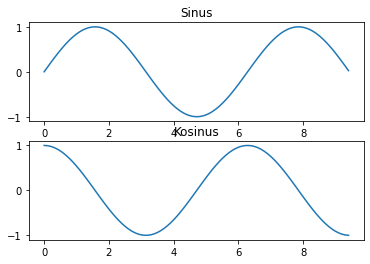

In [ ]:
# Berechnet die Werte der Funktionen Sinus und Cosinus
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Wählt aus einem Grid mit zwei Zeilen und einer Spalte die erste Zelle aus
plt.subplot(2, 1, 1)

# Visualisiert die Sinusfunktion in der ersten Zelle
plt.plot(x, y_sin)
plt.title('Sinus')

# Wählt aus einem Grid mit zwei Zeilen und einer Spalte die zweite Zelle aus und visualisiert darin die Kosinusfunktion
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Kosinus')

# Zeigt die zuvor erstellte Grafik dem Benutzer
plt.show()